In [3]:
import os
import h5py
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import seaborn as sns
import pdb
from scipy.io import loadmat
from scipy import optimize
from math import pi, log2
import warnings
from utils import *

In [4]:
mat_files = [m for m in os.listdir("data") if m.endswith('mat')]
session_list = pd.read_excel('data/CacheRetrieveSessionList.xlsx', index_col=0)
fps = 20
cmap = cm.get_cmap('viridis')

# Population Activity during caching/retrieval

In [7]:
window = fps*10
for mat_file in mat_files:
    # Load data
    all_cache_fr = []
    all_noncache_fr = []
    f = h5py.File("data/" + mat_file, 'r')
    wedges = np.array(f['whichWedge']).squeeze()
    cache_sites = np.array(f['CacheSites']).squeeze()
    enters = np.array(f['CacheFramesEnter']).squeeze().astype(int) - 1
    exits = np.array(f['CacheFramesExit']).squeeze().astype(int) - 1
    was_retrieval = np.array(f['ThisWasRetrieval']).squeeze().astype(bool)
    was_cache = np.logical_not(was_retrieval)
    spikes = np.array(f['S'])
    fr = get_fr(spikes)
    print(f.keys())
    break

<KeysViewHDF5 ['#refs#', 'A', 'C', 'C_raw', 'CacheFrames', 'CacheFramesEnter', 'CacheFramesExit', 'CacheSites', 'CacheVs', 'Extracted', 'IndOnlyCaches', 'IndOnlyRetrievals', 'S', 'ThisWasRetrieval', 'VS', 'VisitDur', 'VisitStart', 'VisitWedge', 'X', 'Y', 'indCachedMe', 'theta', 'whichWedge']>


In [21]:
vs = np.array(f['VS']).squeeze()
visitdur = np.array(f['VisitDur']).squeeze()
visitstart = np.array(f['VisitStart']).squeeze()
visitwedge = np.array(f['VisitWedge']).squeeze()

In [23]:
visitwedge

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15.,
       16.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.,
       10., 11., 12., 13., 14., 15., 16.,  1.,  2.,  3.,  4.,  5.,  6.,
        7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16.,  1.,  2.,  3.,
        4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16.,
        1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.,
       11., 12., 13., 14., 15., 16.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,
        8.,  9., 10., 11., 12., 13., 14., 15., 16.,  1.,  2.,  3.,  4.,
        5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 15.,
       16.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16.,  1.,  2.,  3.,  4.,  3.,  2.,  1., 16., 15.,
       14., 13., 12., 11., 10.,  9.,  8.,  9., 10., 11., 12., 13

In [20]:
vs[0]

array([0.08379781, 0.05028972, 0.01046499, 0.05471357, 0.01075009,
       0.        , 0.        , 0.01345817, 0.        , 0.02294102,
       0.16846338, 0.        , 0.04789024, 0.        , 0.        ,
       0.1176266 , 0.02151134, 0.3245257 , 0.18164172, 0.        ,
       0.02179733, 0.        , 0.        , 0.08115911, 0.11315378,
       0.01168619, 0.03625235, 0.0432431 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00841283, 0.01132201,
       0.        , 0.0114444 , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [17]:
visitdur.shape

(808,)

In [18]:
visitstart.shape

(808,)

In [19]:
visitstart

array([1.00000e+00, 4.88000e+02, 8.74000e+02, 8.92000e+02, 8.98000e+02,
       9.03000e+02, 1.41400e+03, 1.45900e+03, 1.46200e+03, 1.46700e+03,
       1.47300e+03, 1.51700e+03, 1.74700e+03, 1.79300e+03, 2.05600e+03,
       2.07100e+03, 2.07500e+03, 2.08300e+03, 2.28900e+03, 2.29200e+03,
       2.32700e+03, 2.52900e+03, 2.73300e+03, 2.74700e+03, 2.75700e+03,
       3.40400e+03, 3.44700e+03, 3.46100e+03, 3.46900e+03, 3.47500e+03,
       4.11600e+03, 4.17500e+03, 4.18000e+03, 4.59000e+03, 4.62700e+03,
       4.63100e+03, 4.84500e+03, 4.85900e+03, 4.86900e+03, 4.90800e+03,
       5.29300e+03, 5.47200e+03, 5.49300e+03, 5.51100e+03, 6.99100e+03,
       7.49500e+03, 7.54200e+03, 7.54600e+03, 7.74800e+03, 7.75400e+03,
       7.79500e+03, 7.81800e+03, 8.31700e+03, 8.34100e+03, 8.34600e+03,
       8.59900e+03, 8.60300e+03, 8.61000e+03, 8.63100e+03, 8.69300e+03,
       9.00200e+03, 9.01900e+03, 9.02300e+03, 9.02800e+03, 9.60700e+03,
       9.66700e+03, 9.71100e+03, 9.71700e+03, 9.72300e+03, 9.982

/home/chingf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice


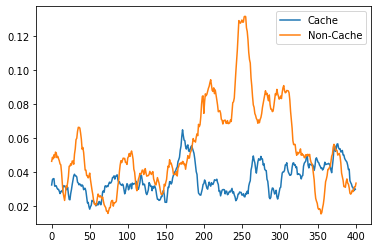

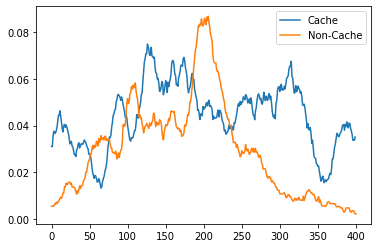

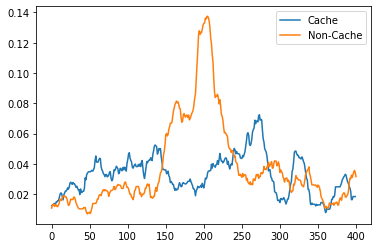

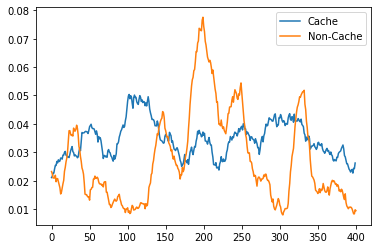

/home/chingf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice


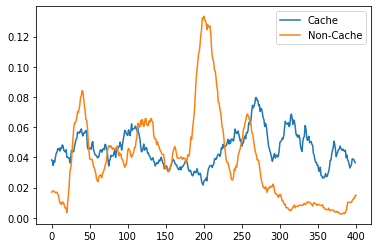

/home/chingf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice


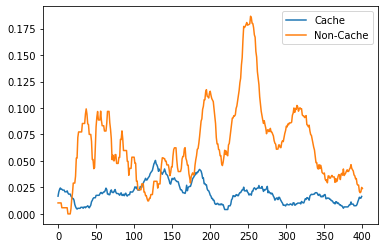

/home/chingf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice


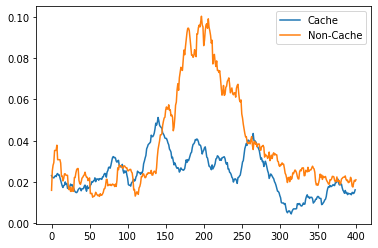

In [5]:
window = fps*10
for mat_file in mat_files:
    # Load data
    all_cache_fr = []
    all_noncache_fr = []
    f = h5py.File("data/" + mat_file, 'r')
    wedges = np.array(f['whichWedge']).squeeze()
    cache_sites = np.array(f['CacheSites']).squeeze()
    enters = np.array(f['CacheFramesEnter']).squeeze().astype(int) - 1
    exits = np.array(f['CacheFramesExit']).squeeze().astype(int) - 1
    was_retrieval = np.array(f['ThisWasRetrieval']).squeeze().astype(bool)
    was_cache = np.logical_not(was_retrieval)
    spikes = np.array(f['S'])
    fr = get_fr(spikes)
    for idx, cache_site in enumerate(cache_sites):
        if was_retrieval[idx]:
            continue
        enter = enters[idx]
        exit = exits[idx]
        cache_frames = np.arange(enter - window, enter + window)
        _, noncache_frames = get_hop_centered_frames(
            window, wedges,
            cache_site, cache_sites,
            enters, exits
            )
        cache_fr = np.nanmean(fr[cache_frames, :], axis=1)
        noncache_fr = np.zeros(noncache_frames.shape)*np.nan
        for noncache_frame in noncache_frames:
            nonnan_idxs = np.argwhere(noncache_frame != -1).squeeze()
            nonnan_frames = noncache_frame[nonnan_idxs].astype(int)
            noncache_fr[:, nonnan_idxs] = np.nanmean(
                fr[nonnan_frames, :], axis=1
                )
        noncache_fr = np.nanmean(noncache_fr, axis=0)
        all_cache_fr.append(cache_fr)
        all_noncache_fr.append(noncache_fr)
    plt.figure()
    plt.plot(np.nanmean(all_cache_fr, axis=0), label="Cache")
    plt.plot(np.nanmean(all_noncache_fr, axis=0), label="Non-Cache")
    plt.legend()
    plt.show()